In [1]:
import tensorflow as tf
data=tf.keras.datasets.mnist

In [2]:
(x_train,y_train),(x_test,y_test)=data.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

**visualizing data**

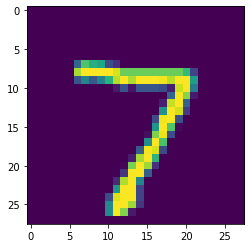

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
plt.show()

**Normalize the data**

In [6]:
x_train=x_train/255
x_test=x_test/255

**Resizing image**

In [7]:
import numpy as np
x_train=np.array(x_train).reshape((-1, 28, 28, 1))
x_test =np.array(x_test).reshape((-1, 28, 28, 1))

In [8]:
x_train.shape

(60000, 28, 28, 1)

**Creating deep neural network**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Conv2D,MaxPooling2D

In [10]:
model=Sequential()

#first cnn layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

#second cnn layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

#third cnn layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

#fully connected layer-1
model.add(Flatten())
model.add(Dense(65, activation='relu', kernel_initializer='he_uniform'))

#fully connected layer-2
model.add(Dense(39, activation='relu', kernel_initializer='he_uniform'))

#fully connected layer-3
#output layer
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 12s 8ms/step - loss: 0.2570 - accuracy: 0.9199 - val_loss: 0.1128 - val_accuracy: 0.9646
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0883 - accuracy: 0.9726 - val_loss: 0.0899 - val_accuracy: 0.9724
Epoch 3/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0619 - accuracy: 0.9813 - val_loss: 0.0672 - val_accuracy: 0.9781
Epoch 4/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0722 - val_accuracy: 0.9789
Epoch 5/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0555 - val_accuracy: 0.9830


In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0558 - accuracy: 0.9837


[0.05583057180047035, 0.9836999773979187]

In [15]:
y_pred=model.predict([x_test])

In [20]:
print(np.argmax(y_pred[178]))

1


In [17]:
x_test=x_test.reshape(-1,28,28)


In [18]:
x_test.shape

(10000, 28, 28)

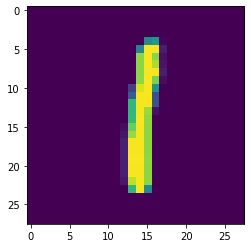

In [21]:
plt.imshow(x_test[178])